In [2]:
# import nltk
# from nltk import FreqDist
# nltk.download('stopwords') # run this one time

In [3]:
import pandas as pd
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# Libraries for visualization

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns


# nltk libraries
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

%matplotlib inline
pd.set_option("display.max_colwidth", 200)

c:\users\bishn_000\appdata\local\programs\python\python37\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""


In [4]:
# Read the data file and store in a Pandas DataFrame

df = pd.read_json('data/Automotive_5.json', lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3F73SC1LY51OO,B00002243X,Alan Montgomery,"[4, 4]",I needed a set of jumper cables for my new car and these had good reviews and were at a good price. They have been used a few times already and do what they are supposed to - no complaints there....,5,Work Well - Should Have Bought Longer Ones,1313539200,"08 17, 2011"
1,A20S66SKYXULG2,B00002243X,alphonse,"[1, 1]","These long cables work fine for my truck, but the quality seems a little on the shabby side. For the money I was not expecting 200 dollar snap-on jumper cables but these seem more like what you wo...",4,Okay long cables,1315094400,"09 4, 2011"
2,A2I8LFSN2IS5EO,B00002243X,Chris,"[0, 0]","Can't comment much on these since they have not yet been used (I will come back and update my review is I find any issues after first use) ... but they are built solid, nice tough big hard clamps ...",5,Looks and feels heavy Duty,1374710400,"07 25, 2013"
3,A3GT2EWQSO45ZG,B00002243X,DeusEx,"[19, 19]","I absolutley love Amazon!!! For the price of a set of cheap Booster/Jumper Cables in a brick and morter store, you can buy extra long and heavy duty jumpers! First off, don't be the person that ...",5,Excellent choice for Jumper Cables!!!,1292889600,"12 21, 2010"
4,A3ESWJPAVRPWB4,B00002243X,E. Hernandez,"[0, 0]","I purchased the 12' feet long cable set and they arrived in a retail cardboard box with handle, which could be used as a storage and carrying case for these cables, although I will not need to sto...",5,"Excellent, High Quality Starter Cables",1341360000,"07 4, 2012"


In [5]:
def getFrequencyDistribution(words, num = 20):
    
    fdist = FreqDist(words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 'num' most frequent words
    d = words_df.nlargest(columns="count", n = num) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()
    
    return words_df

In [6]:
def removeStopWords(text):
    stop_words = set(stopwords.words('english'))
    return [w for w in text if not w in stop_words and len(w) > 2]

In [7]:
def removeNumbersAndSymbols(words):
    return [w.lower() for w in words if w.isalpha()]

In [8]:
def runLemmatization(text): # filter noun and adjective
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

In [9]:
def executeMethod(reviews, method):
    return [method(rev) for rev in reviews]

In [18]:
def getAllWords(reviews):
    return [w for rev in reviews for w in rev]

In [10]:
tokenized_reviews = [word_tokenize(rev) for rev in df['reviewText']]

print(tokenized_reviews[1])

# freqDist = getFrequencyDistribution(all_words, 30)

['These', 'long', 'cables', 'work', 'fine', 'for', 'my', 'truck', ',', 'but', 'the', 'quality', 'seems', 'a', 'little', 'on', 'the', 'shabby', 'side', '.', 'For', 'the', 'money', 'I', 'was', 'not', 'expecting', '200', 'dollar', 'snap-on', 'jumper', 'cables', 'but', 'these', 'seem', 'more', 'like', 'what', 'you', 'would', 'see', 'at', 'a', 'chinese', 'knock', 'off', 'shop', 'like', 'harbor', 'freight', 'for', '30', 'bucks', '.']


In [11]:
filtered_revs = executeMethod(tokenized_reviews, removeNumbersAndSymbols)
filtered_revs = executeMethod(filtered_revs, removeStopWords)

#freqDist = getFrequencyDistribution(sum(filtered_revs,[]), 30)

In [12]:
lemmatized_revs = executeMethod(filtered_revs, runLemmatization)
#freqDist = getFrequencyDistribution(lemmatized_words, 30)

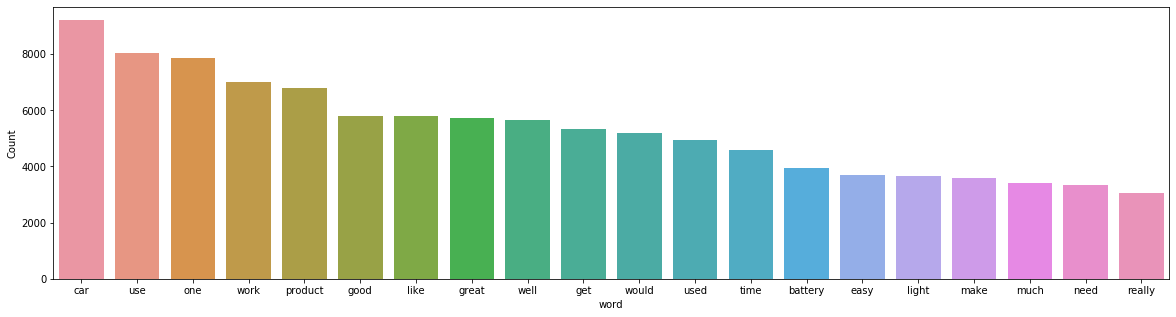

In [21]:
all_words = getAllWords(lemmatized_revs)
freqDist = getFrequencyDistribution(all_words)

In [26]:
# Create Dictionary
dictionary = corpora.Dictionary(lemmatized_revs)

#convert to document term matrix
doc_term_matrix = [dictionary.doc2bow(rev) for rev in lemmatized_revs]

In [28]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model (Uncomment for training)
# lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,chunksize=1000, passes=50)

In [29]:
lda_model.print_topics()

[(0,
  '0.032*"car" + 0.022*"product" + 0.019*"towel" + 0.017*"use" + 0.013*"wax" + 0.011*"water" + 0.011*"used" + 0.010*"wash" + 0.010*"great" + 0.009*"good"'),
 (1,
  '0.053*"blade" + 0.045*"wiper" + 0.020*"windshield" + 0.011*"rain" + 0.011*"snow" + 0.010*"bosch" + 0.009*"side" + 0.009*"last" + 0.009*"year" + 0.008*"old"'),
 (2,
  '0.037*"light" + 0.027*"battery" + 0.016*"car" + 0.015*"bulb" + 0.014*"power" + 0.010*"device" + 0.010*"led" + 0.009*"one" + 0.009*"unit" + 0.008*"bright"'),
 (3,
  '0.015*"use" + 0.011*"keep" + 0.010*"great" + 0.010*"work" + 0.010*"easy" + 0.009*"water" + 0.008*"trailer" + 0.007*"mat" + 0.007*"well" + 0.007*"bag"'),
 (4,
  '0.014*"like" + 0.011*"leather" + 0.010*"would" + 0.009*"get" + 0.009*"well" + 0.009*"look" + 0.008*"product" + 0.007*"work" + 0.007*"really" + 0.007*"good"'),
 (5,
  '0.013*"car" + 0.011*"oil" + 0.010*"one" + 0.010*"product" + 0.009*"filter" + 0.009*"price" + 0.008*"work" + 0.007*"great" + 0.007*"engine" + 0.007*"amazon"'),
 (6,
  '0.0

In [30]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

c:\users\bishn_000\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.024231 -0.086671       1        1  19.655396
0      0.012333 -0.121417       2        1  18.006483
4     -0.033622 -0.080652       3        1  17.411549
6     -0.095948  0.038843       4        1  16.212250
2      0.004258 -0.108257       5        1  12.652270
3     -0.201852  0.201046       6        1  10.285883
1      0.290600  0.157107       7        1   5.776182, topic_info=     Category         Freq       Term        Total  loglift  logprob
233   Default  4103.000000      light  4103.000000  30.0000  30.0000
1438  Default  2530.000000      blade  2530.000000  29.0000  29.0000
1396  Default  2134.000000      wiper  2134.000000  28.0000  28.0000
62    Default  2829.000000    battery  2829.000000  27.0000  27.0000
784   Default  2842.000000      towel  2842.000000  26.0000  26.0000
...       ...          ...        ...          ...      ...      ...
6      Topic7   314.050507        car  9415.406250  -0.5491  -5.0260
1252   Topic7   214.742355  installed  1093.374878   1.2238  -5.4061
357    Topic7   252.485153       easy  3496.034424   0.2234  -5.2442
21     Topic7   228.924805        new  2011.868652   0.6780  -5.3421
56     Topic7   224.095093       work  6659.752930  -0.5403  -5.3635

[464 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
2997       3  0.998682    adhesive
1224       4  0.989721  adjustable
751        1  0.396874         air
751        4  0.602367         air
131        1  0.194298        also
...      ...       ...         ...
411        2  0.213185        year
411        3  0.163849        year
411        5  0.117229        year
411        7  0.185575        year
20665      1  0.998962       zubie

[799 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 5, 7, 3, 4, 2])

In [32]:
# Save trained model locally.
import pickle
save_file = open('lda_reviews_model.pickle', 'wb')
pickle.dump(lda_model, save_file)
save_file.close()
